In [1]:
import numpy as np 
import pandas as pd
file=pd.read_csv('adult.csv')
file.head()
#the data has ? so we replace them with nan which is identifoed by pandas as missing values
file.replace('?',np.nan,inplace=True)
file.head()
file.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [2]:
#replacing missing values with the most frequent values in the respective column
file.head()
file['workclass'].value_counts()

file['workclass'].replace(np.nan,'private',inplace=True)
file['occupation'].replace(np.nan,'Prof-speciality',inplace=True)
file['native.country'].replace(np.nan,'United-States',inplace=True)
file.isnull().sum()

file.describe(include=[np.object])
file['income'].value_counts()


<=50K    24720
>50K      7841
Name: income, dtype: int64

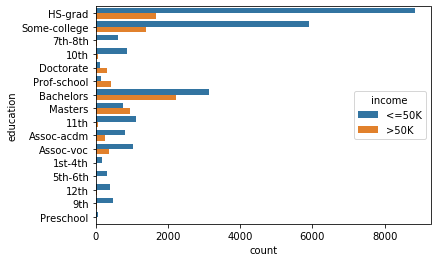

In [3]:
#a countplot showing the income of people with different education levels
import seaborn as sns
file.corr()
#age and income 
sns.countplot(y='education',hue='income',data=file)


(array([5570., 5890., 6048., 6163., 3967., 2591., 1595.,  496.,  174.,
          67.]),
 array([17. , 24.3, 31.6, 38.9, 46.2, 53.5, 60.8, 68.1, 75.4, 82.7, 90. ]),
 <a list of 10 Patch objects>)

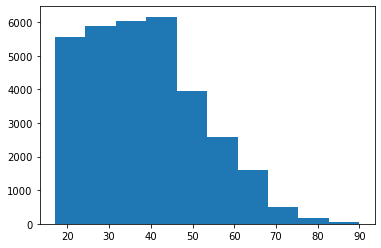

In [4]:
import matplotlib.pyplot as plt
#histogram showing the age distribution 
plt.hist(file['age'])

<BarContainer object of 3 artists>

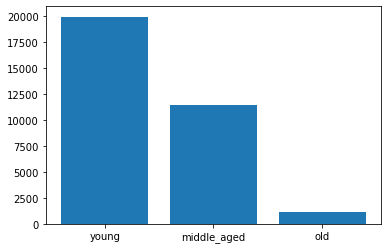

In [10]:
#creating bins for age 
bins=np.linspace(min(file['age']),max(file['age']),4)
groups=['young','middle_aged','old']
file['age_binned']=pd.cut(file['age'],bins,labels=groups,include_lowest=True)
file[['age','age_binned']].head(20)
plt.bar(groups,file['age_binned'].value_counts())

In [6]:
file.head()
file.drop('age',axis=1)


,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,age_binned
0,private,77053,HS-grad,9,Widowed,Prof-speciality,Not-in-family,White,Female,0,4356,40,United-States,<=50K,old
1,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,old
2,private,186061,Some-college,10,Widowed,Prof-speciality,Unmarried,Black,Female,0,4356,40,United-States,<=50K,old
3,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,middle_aged
4,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,young
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K,young
32557,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,young
32558,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,young
32559,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,middle_aged


In [18]:

newcol=file['age_binned'].values

file.drop(['age_binned','age'],axis=1)

,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,private,77053,HS-grad,9,Widowed,Prof-speciality,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,private,186061,Some-college,10,Widowed,Prof-speciality,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [27]:
#file.insert(1,'age_binned',newcol)
file.head()
#file.drop(['age','age_binned'],axis=1,inplace=True)
#file.insert(1,'age-binned',newcol)
file.head()

,workclass,age-binned,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,private,old,77053,HS-grad,9,Widowed,Prof-speciality,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,Private,old,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,private,old,186061,Some-college,10,Widowed,Prof-speciality,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,Private,middle_aged,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,Private,young,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [28]:
# dropping education.num and fnlwgt as they are not importamt
file.drop(['fnlwgt','education.num'],axis=1,inplace=True)


In [107]:
# converting categorical values into numerical ones 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X=file.loc[:,'workclass':'native.country']
categorical = X.select_dtypes(include=['object']).columns
for col in categorical:
    X[col]=le.fit_transform(file[col])

X.head()
X['age-binned']=X['age-binned'].map({'young':0,'middle_aged':1,'old':2})
X.head()
Y=file['income']
Y=pd.DataFrame(Y)
Y.replace({'income': {0: '<=50k', 1: '>50k'}},inplace=True)
Y.head()
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)



In [108]:
#feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=pd.DataFrame(scaler.fit_transform(X_train),columns=X.columns)
X_test=pd.DataFrame(scaler.fit_transform(X_test),columns=X.columns)


In [109]:
#using logistic regression to train the model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
y_pred = logreg.predict(X_test)

print('Logistic Regression accuracy score with all the features: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))

c:\users\waleed ahmed\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Logistic Regression accuracy score with all the features: 0.8022


In [113]:
#applying pca to reduce dimensions
from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
cumulativesum = np.cumsum(pca.explained_variance_ratio_)
#the index when the variance is greater than 90 percent
dimensions = np.argmax(cumulativesum >= 0.90)+1
#we can reduce to dimensions to improve accuracy
print(dimensions)

10
